In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [36]:
# Storing the data file path in a variable

data_file_location ='E:\SEMESTER 3\Machine Learning by Balaji Srinivasan\Concrete_Data.xls'

Concrete_Data = pd.read_excel(data_file_location) # reading the excel file using pandas

####  Dividing the data into two parts X and Y where X are the features and Y is the output/result

In [39]:
# Storing the concrete compression strength column in Y

Y = Concrete_Data.iloc[:,-1]
Y

0       79.986111
1       61.887366
2       40.269535
3       41.052780
4       44.296075
          ...    
1025    44.284354
1026    31.178794
1027    23.696601
1028    32.768036
1029    32.401235
Name: Concrete compressive strength(MPa, megapascals) , Length: 1030, dtype: float64

In [38]:
X = Concrete_Data.drop(['Concrete compressive strength(MPa, megapascals) '],axis=1)

In [6]:
X.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


## Train test split in 70:30 ratio

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

X_train , X_test , Y_train, Y_test = train_test_split(X,Y, train_size=0.7 ,random_state=5)

## Normal form equation to find W

### For train dataset

In [63]:
W_train = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(Y_train)


In [64]:
Y_pred_train = X.dot(W_train)
r_2_score_train = r2_score(Y,Y_pred_train)
mse_train  = mean_squared_error(Y, Y_pred_train)

print('R-squared value for training dataset is: ',r_2_score_train )
print('Mean squared error for training dataset is: ',mse_train)

R-squared value for training dataset is:  0.6131817181940176
Mean squared error for training dataset is:  107.84832762793837


### For test dataset

In [65]:
W_test = np.linalg.inv(X_test.T.dot(X_test)).dot(X_test.T).dot(Y_test)


In [66]:
Y_pred_test = X.dot(W_test)
r_2_score_test = r2_score(Y,Y_pred_test)
mse_test  = mean_squared_error(Y, Y_pred_test)

print('R-squared value for training dataset is: ',r_2_score_test )
print('Mean squared error for training dataset is: ',mse_test)

R-squared value for training dataset is:  0.6027170450236006
Mean squared error for training dataset is:  110.76597023607268


#### The result obtained from normal equation has less accurate fit as compared to the linear regression fit from last homework assignment. It can be observed from the r2 score. In the training data itself in the linear regression model from last assignment, r2 score was close to 0.67 but here in normal equation approach it is 0.613.
#### Similiar trend is observed in test data as well.

## L2 regularisation for train data

In [79]:
import math
W_train_reg_m = []
for i in range(-int(math.exp(11)),int(math.exp(11)),1000):
    W_train_reg = np.linalg.inv(X_train.T.dot(X_train)+i*np.ones(8)).dot(X_train.T).dot(Y_train)
    W_train_reg_m.append(W_train_reg)

In [80]:
Y_pred_train_reg_m  = []
for i in range(len(W_train_reg_m)):
    Y_pred_train_reg =  X_train.dot(W_train_reg_m[i])# making predictions
    Y_pred_train_reg_m.append(Y_pred_train_reg)
    
#print(Y_pred_train_reg_m)

In [83]:
r_2_matrix_train = []
mse_matrix = []
for i in range(len(W_train_reg_m)):


    r_square_score = r2_score(Y_train,Y_pred_train_reg_m[i])
    mse  = mean_squared_error(Y_train, Y_pred_train_reg_m[i])
    mse_matrix.append(mse)
    r_2_matrix_train.append(r_square_score)

In [87]:
r2_score_max_train = max(r_2_matrix_train)
print(r2_score_max_train)
[r_2_matrix_train.index(max(r_2_matrix_train))]


0.6334546134654757


[60]

126


Text(0, 0.5, 'R2_score_train_data')

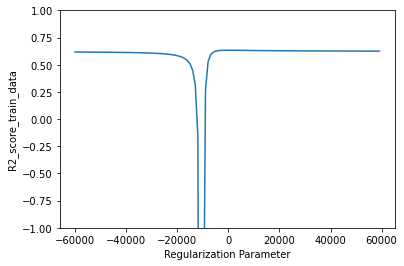

In [99]:
x_bar = range(-int(math.exp(11)),int(math.exp(11)),1000)
print(x_bar[60])
plt.plot(x_bar,r_2_matrix_train)
plt.ylim(-1,1)
plt.xlabel('Regularization Parameter')
plt.ylabel('R2_score_train_data')

### From the above graph it is evident that for different values of Regularisation parameters , the value of r2 score varies.
### For the negative value of the parameter there is a sudden drop followed by the sudden shoot up.
### For the positive value of the parameter is more or less constant that is very slight variation.

## L2 regularisation for train data

In [92]:
import math
W_test_reg_m = []
for i in range(-int(math.exp(11)),int(math.exp(11)),1000):
    W_test_reg = np.linalg.inv(X_test.T.dot(X_test)+i*np.ones(8)).dot(X_test.T).dot(Y_test)
    W_test_reg_m.append(W_test_reg)

In [93]:
Y_pred_test_reg_m  = []
for i in range(len(W_test_reg_m)):
    Y_pred_test_reg =  X_test.dot(W_test_reg_m[i])# making predictions
    Y_pred_test_reg_m.append(Y_pred_test_reg)

In [94]:
r_2_matrix_test = []
mse_matrix_test = []
for i in range(len(W_test_reg_m)):


    r_2_score_test = r2_score(Y_test,Y_pred_test_reg_m[i])
    mse_test  = mean_squared_error(Y_test, Y_pred_test_reg_m[i])
    mse_matrix_test.append(mse_test)
    r_2_matrix_test.append(r_2_score_test)

In [96]:
r2_score_max_test = max(r_2_matrix_test)
print(r2_score_max_test)


0.5823523125524208


126


Text(0, 0.5, 'R2_score_test data')

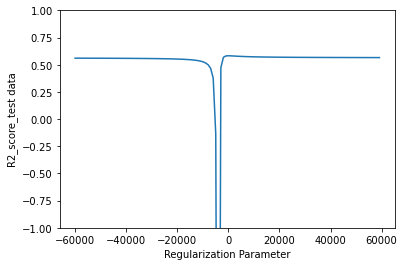

In [98]:
x_bar = range(-int(math.exp(11)),int(math.exp(11)),1000)
print(x_bar[60])
plt.plot(x_bar,r_2_matrix_test)
plt.ylim(-1,1)
plt.xlabel('Regularization Parameter')
plt.ylabel('R2_score_test data')

### In the test data we also find kind of same pattern as that of train data

In [100]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [101]:
Quad_reg = LinearRegression()
Quadratic = PolynomialFeatures(degree=2)
X_train_quad = Quadratic.fit_transform(X)

In [104]:
X_train_quad.shape

(1030, 45)

### Thus for the Quadratic model, in our data we have 45 features

In [114]:
Quad_reg.fit(X_train,Y_train)

Y_quad_train = Quad_reg.predict(Quadratic.fit_transform(X_train))

LinearRegression()

In [106]:
Quad_reg = LinearRegression()
Quadratic = PolynomialFeatures(degree=3)
X_train_quad = Quadratic.fit_transform(X)

In [107]:
X_train_quad.shape

(1030, 165)

## For cubic model it will have 165 features